# Tarea 5


Program a 4th-order Runge-Kutta function, called rk4, with the following inputs:

- A function. This function must be able to return a vector, in case you want to solve a system of equations.
- A tuple containing the initial time, final time, and step size.
- The initial values for all the variables.

Copy the code of your function into the box below. Be sure to write a description at the beginning of the function using the docstring convention.


In [9]:
import numpy as np

def rk4(func, t_span, y0):
    """
    4th-order Runge–Kutta ODE function

    Parameters
    ----------
    func : the callable
        A function f(t, y) that returns the derivative dy/dt.
        It accepts:
          - t : float
          - y : array_like
        and return an array_like (vector) of the same shape as y (so you can solve systems).
    t_span : tuple of floats
        (t0, tf, h):
          - t0 : initial time
          - tf : final time
          - h  : step size
    y0 : array_like
        Initial value(s) of y at t = t0. Can be a scalar or a list/array for systems.

    Returns
    -------
    t : ndarray
        1D array of time points from t0 to tf with spacing h.
    y : ndarray
        2D array of solution values: each row corresponds to a time in `t`,
        and each column to one component of y.
    """

t0, tf, h = t_span
t = np.arange(t0, tf + h, h)
y0 = np.atleast_1d(y0).astype(float)
y = np.zeros((len(t), y0.size))
y[0] = y0

for i in range(len(t) - 1):
    ti = t[i]
    yi = y[i]
    k1 = func(ti, yi)
    k2 = func(ti + h/2, yi + h*k1/2)
    k3 = func(ti + h/2, yi + h*k2/2)
    k4 = func(ti + h,yi + h*k3)
    y[i+1] = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

return t, y

NameError: name 'func' is not defined

In the following circuit 
[imagen!](<"circuio.png">)
The voltages of each capacitor are given by the following equations:

$$
\begin{aligned}
\frac{1}{R_{2}C_{3}} \frac{dV_{3}}{dt}+ \frac{1}{R_{2}C_{4}} \frac{dV_{4}}{dt}+V_{3}=V\\
\frac{1}{R_{4}C_{4}} \frac{dV_{4}}{dt}+V_{4}-V_{3}=0\\
\end{aligned}
$$

Where $R_2=R_4=100\Omega$, $C_3=50\mu f$, and $C_4=200\mu f$

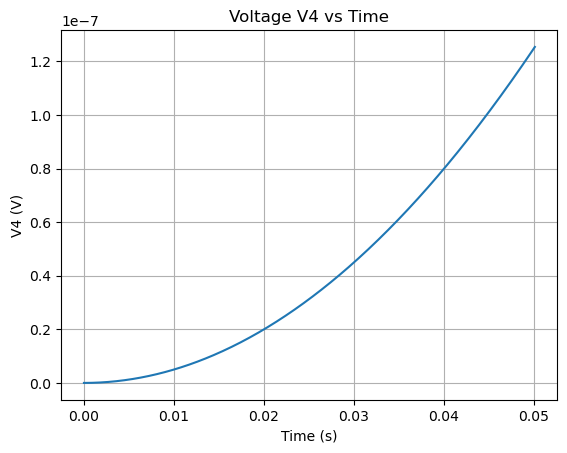

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(func, t_span, y0):
    """
    4th-order Runge–Kutta ODE function

    Parameters
    ----------
    func : the callable
        A function f(t, y) that returns the derivative dy/dt.
        It accepts:
          - t : float
          - y : array_like
        and return an array_like (vector) of the same shape as y (so you can solve systems).
    t_span : tuple of floats
        (t0, tf, h):
          - t0 : initial time
          - tf : final time
          - h  : step size
    y0 : array_like
        Initial value(s) of y at t = t0. Can be a scalar or a list/array for systems.

    Returns
    -------
    t : ndarray
        1D array of time points from t0 to tf with spacing h.
    y : ndarray
        2D array of solution values: each row corresponds to a time in `t`,
        and each column to one component of y.
    """

    t0, tf, h = t_span
    t = np.arange(t0, tf + h, h)
    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(t), y0.size))
    y[0] = y0

    for i in range(len(t) - 1):
        ti = t[i]
        yi = y[i]
        k1 = func(ti, yi)
        k2 = func(ti + h/2, yi + h*k1/2)
        k3 = func(ti + h/2, yi + h*k2/2)
        k4 = func(ti + h,yi + h*k3)
        y[i+1] = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y 

R2 = R4 = 100.0         # Ohms
C3 = 50e-6              # Farads
C4 = 200e-6             # Farads
V_supply = 1.0          # Volt (unit step input)

# System of ODEs derived:
# dV3/dt = 0.005 * (V - 2*V3 + V4)
# dV4/dt = 0.02  * (V3 - V4)
def circuit_odes(t, vars):
    V3, V4 = vars
    dV4_dt = R4 * C4 * (V3 - V4)
    dV3_dt = C3 * (R2 * (V_supply - V3) - R4 * (V3 - V4))
    return np.array([dV3_dt, dV4_dt])

# Initial conditions and integration span
y0 = [0.0, 0.0]            # V3(0)=0, V4(0)=0
t_span = (0.0, 0.05, 1e-4) # simulate from 0 to 0.05 s with step 0.0001 s

# Solve
t, y = rk4(circuit_odes, t_span, y0)
V4 = y[:, 1]

# Plot V4 vs time
plt.figure()
plt.plot(t, V4)
plt.xlabel('Time (s)')
plt.ylabel('V4 (V)')
plt.title('Voltage V4 vs Time')
plt.grid(True)
plt.show()# Given parameters
R2 = R4 = 100.0         # Ohms
C3 = 50e-6              # Farads
C4 = 200e-6             # Farads
V_supply = 1.0          # Volt (unit step input)
